In [10]:
import random

import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns

import matplotlib.pyplot as plt
from scipy.stats import expon

pd.set_option('display.max_rows', 100, 'display.max_columns', 100)


from matplotlib.colors import ListedColormap
import matplotlib as mpl
COLOR = 'white'
mpl.rcParams['text.color'] = "black"
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR


from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture

from sklearn.preprocessing import StandardScaler

from nptyping import NDArray, Float64, Shape

from plotting.plot_funcs import plot_cluster

seed = np.random.randint(0, 1e9)


In [11]:
from data_simulation.simulate_data import Experiment
exp1 = Experiment(99557787, max_cluster_number=6)
df = exp1.df
X = exp1.X
X.shape

(276, 2)

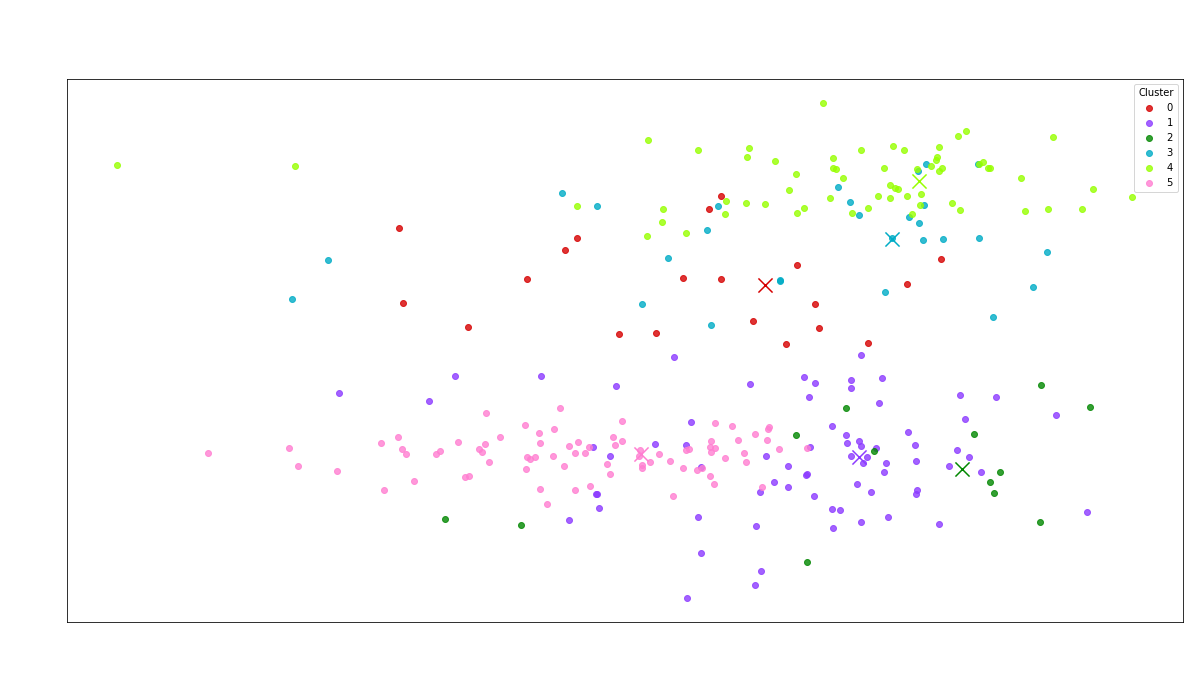

In [12]:
plot_cluster(exp1.df, "cluster", title="True Clusters")

### OPTICS

In [28]:
from cluster_initialization.init_class import Cluster_initialization, Routine

cluster_init = Cluster_initialization(exp1.df, routine = Routine.optics)

In [14]:
#plot_cluster(cluster_init.df, "init_cluster", title="Cluster initizialization")

#### DBScan

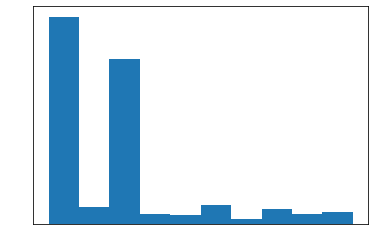

In [15]:
dbscan = DBSCAN(
    eps=0.1,
    min_samples=3,
    metric="mahalanobis", 
    metric_params={"V": np.cov(X, rowvar=False)}
    )
y_pred = dbscan.fit_predict(X)
plt.hist(y_pred)
plt.show()

#### KMeans + Shillouette Score

### EM-Algorithm

In [29]:
params_array = cluster_init.init_params_array
init_params = cluster_init.init_params

In [17]:
from plotting.plot_funcs import plot_responsibilities

#plot_responsibilities(exp1, params_array)

### single EM run

### multiple EM runs

In [31]:
from joblib import Parallel, delayed
from tqdm import tqdm
from em_algorithm.processing_results import process_parallel_results
from em_algorithm.em_funcs import run_EM
from model_selection.scoreboard import create_scoreboard


em_params = {
    "max_iter": 1000,
    "em_tol": 1e-6,
    "min_mix_coef": 0.01
}
cluster_init.sample(N_cluster_max=10, N_runs_per_clusternumber=10)
init_params_arrays = cluster_init.sampled_init_params_array
parallel_results = Parallel(n_jobs=10)(delayed(run_EM)(X, init_param_array, **em_params) for init_param_array in tqdm(init_params_arrays))

results = process_parallel_results(parallel_results)
df_scores, df_scores_na = create_scoreboard(results, X)
print(f"Number of Singularites: {len(df_scores_na.index)}")

100%|██████████| 100/100 [00:37<00:00,  2.69it/s]


Number of Singularites: 1


c:\Users\HydraJ\Documents\Uni\Bachelor&Master  Physik\BA_Arbeit\Code\model_selection\scoreboard.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scores[criteria + "_rank"] = df_scores[criteria].rank(method="min", **items["rank_params"]).astype(int)
c:\Users\HydraJ\Documents\Uni\Bachelor&Master  Physik\BA_Arbeit\Code\model_selection\scoreboard.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scores[criteria + "_rank"] = df_scores[criteria].rank(method="min", **items["rank_params"]).astype(int)


In [26]:
df_scores.head(40)

,param_index,iter_steps,execution_time,ll,AIC,BIC,silhouette,HC,HC_scaled,N_cluster,ll_rank,AIC_rank,BIC_rank,silhouette_rank,HC_rank,HC_scaled_rank,TOTAL_score,TOTAL_rank
0,43,42,0.459299,-504.646290,512.646290,527.127893,0.534449,1247.880304,241.268864,2,1,1,1,1,1,1,6,1
1,47,65,0.613566,-504.648029,512.648029,527.129632,0.534449,1247.880304,241.268864,2,2,2,2,1,1,1,9,2
2,40,66,0.458989,-504.648164,512.648164,527.129768,0.534449,1247.880304,241.268864,2,3,3,3,1,1,1,12,3
3,59,70,0.448722,-504.648256,512.648256,527.129859,0.534449,1247.880304,241.268864,2,4,4,4,1,1,1,15,4
4,50,81,0.563442,-504.648323,512.648323,527.129926,0.534449,1247.880304,241.268864,2,5,5,5,1,1,1,18,5
5,49,86,0.536886,-504.648518,512.648518,527.130122,0.534449,1247.880304,241.268864,2,6,6,6,1,1,1,21,6
6,55,72,0.400389,-504.648559,512.648559,527.130163,0.534449,1247.880304,241.268864,2,7,7,7,1,1,1,24,7
7,30,73,0.535594,-504.648701,512.648701,527.130305,0.534449,1247.880304,241.268864,2,8,8,8,1,1,1,27,8
8,35,40,0.297876,-504.649529,512.649529,527.131132,0.534449,1247.880304,241.268864,2,9,9,9,1,1,1,30,9
9,44,49,0.556703,-504.649708,512.649708,527.131312,0.534449,1247.880304,241.268864,2,10,10,10,1,1,1,33,10


In [32]:
df_scores.head(40)

,param_index,iter_steps,execution_time,ll,AIC,BIC,silhouette,HC,HC_scaled,N_cluster,ll_rank,AIC_rank,BIC_rank,silhouette_rank,HC_rank,HC_scaled_rank,TOTAL_score,TOTAL_rank
0,16,74,0.458667,-504.648334,512.648334,527.129937,0.534449,1247.880304,241.268864,2,1,1,1,1,1,1,6,1
1,14,87,0.371009,-504.648422,512.648422,527.130025,0.534449,1247.880304,241.268864,2,2,2,2,1,1,1,9,2
2,11,94,0.692320,-504.648568,512.648568,527.130171,0.534449,1247.880304,241.268864,2,3,3,3,1,1,1,12,3
3,17,53,0.572156,-504.650050,512.650050,527.131654,0.534449,1247.880304,241.268864,2,4,4,4,1,1,1,15,4
4,20,269,2.176416,-529.393511,541.393511,563.115917,0.301080,520.204265,137.633440,3,5,5,5,12,9,6,42,5
5,21,285,2.270046,-529.394195,541.394195,563.116600,0.301080,520.204265,137.633440,3,6,6,6,12,9,6,45,6
6,28,299,2.002465,-529.395374,541.395374,563.117779,0.301080,520.204265,137.633440,3,8,8,8,12,9,6,51,7
7,26,299,2.107091,-529.394293,541.394293,563.116699,0.301080,520.204265,137.633440,3,7,7,7,12,9,11,53,8
8,24,298,2.096406,-529.395498,541.395498,563.117903,0.301080,520.204265,137.633440,3,9,9,9,12,9,6,54,9
9,29,319,2.069388,-529.399691,541.399691,563.122096,0.301080,520.204265,137.633440,3,11,11,11,12,9,6,60,10


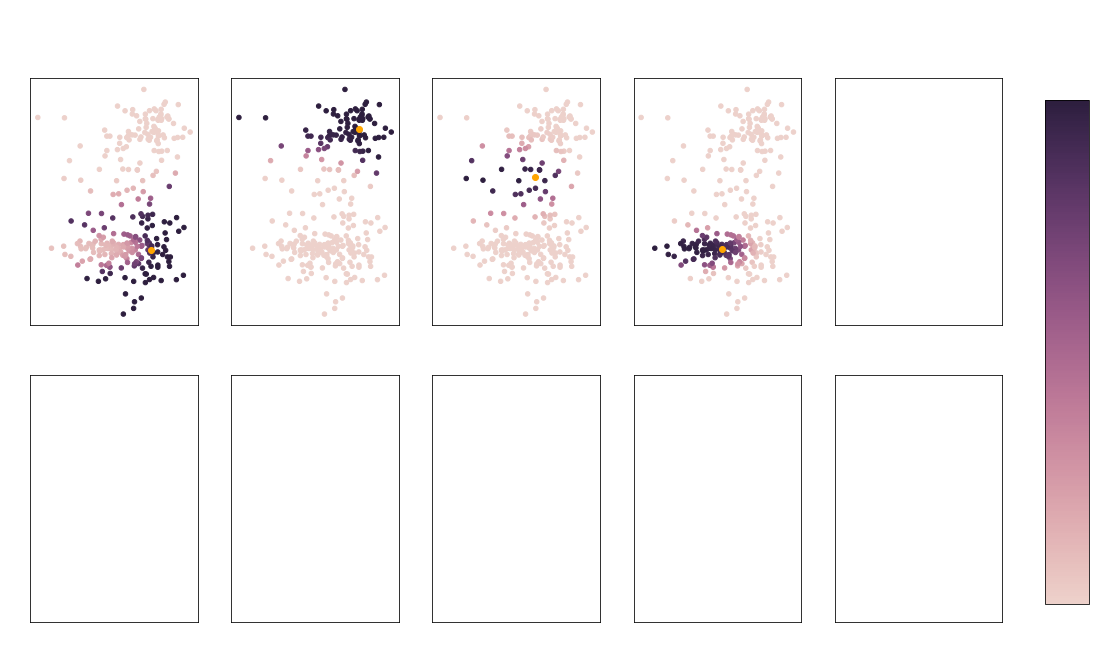

In [33]:
model_idx = 13

plot_responsibilities(exp1, results["params"][df_scores.param_index[model_idx]])  # best AIC score

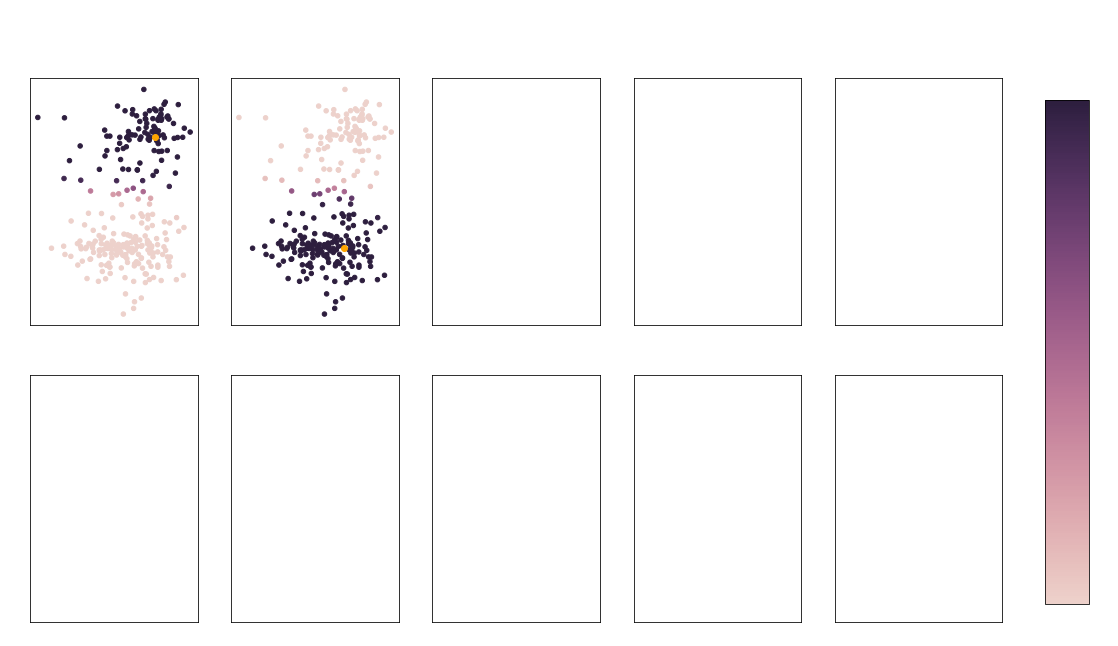

In [34]:
model_idx = 0

plot_responsibilities(exp1, results["params"][df_scores.param_index[model_idx]])  # best AIC score

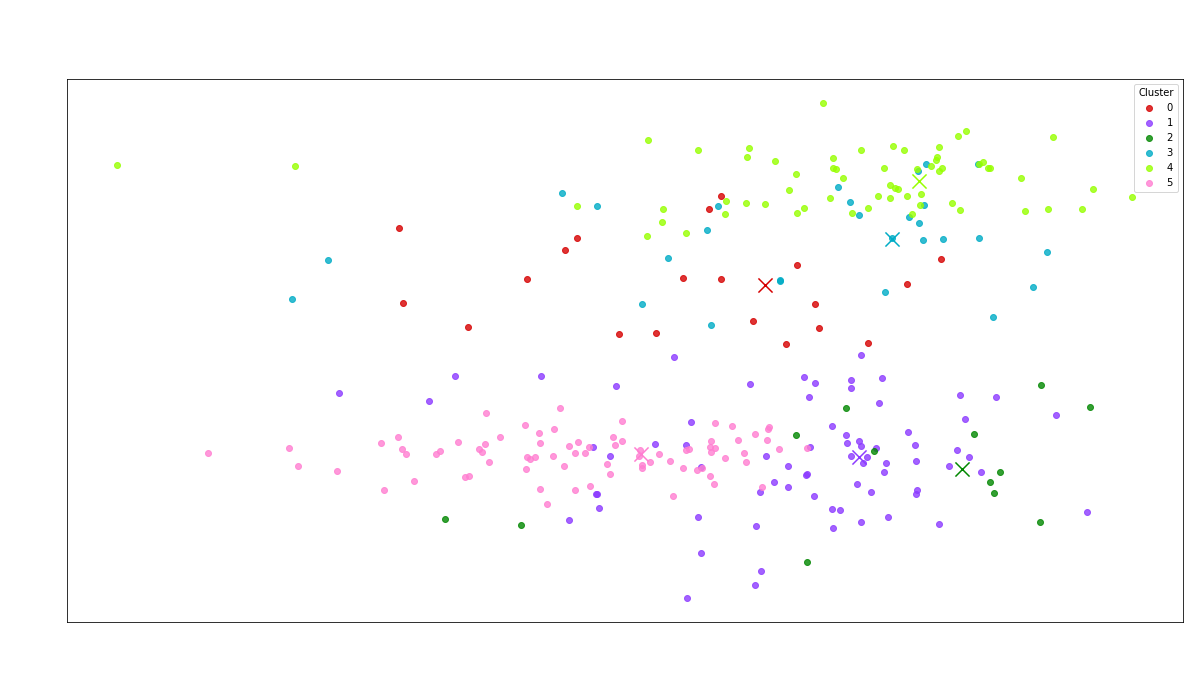

In [21]:
plot_cluster(exp1.df, "cluster", title="True Clusters")